# Name-     -Komal
# Student_id-33275440

# -------------Model Complexity and Model Selection-------------------------------


                                             Section-1

## ----------------------------------KnnRegressor--------------------------------------
KNN regressor returns the average of the neighbors’ values.

### Import necessary libraries

In [1]:
from scipy.spatial import KDTree
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

### Explain-
Question-1 (Part-1)

*   Initializing KNN Regressor with a given value of k(Number of nearest neighbors to consider)
*   Fit the KNN Regressor to the training datalist item.
 *   Parameters:
     * (- x (array-like): Training data features.
     * - y (array-like): Training data labels.)
*   Build a KDTree for efficient nearest neighbor search
*   Predicting labels for new data using the KNN Regressor, and returning Predicted labels for the new data.





## Question-1 (Part-I)

In [2]:
class KnnRegressor:

    def __init__(self, k):         #Initialize the KNN Regressor with a given value of k(Number of nearest neighbors to consider)
        self.k = k

    def fit(self, x, y):
        self.y_train_ = y
        self.x_train_kdtree_ = KDTree(x)
        return self

    def predict(self, x):
        _, neighbours = self.x_train_kdtree_.query(x, k=self.k)  #Query the KDTree to find the k nearest neighbors for each data point in x
        neighbours = neighbours.reshape(len(x), self.k)          #Reshape the array to have shape (len(x), k)
        neighbour_values = self.y_train_[neighbours]              # Get the labels of the nearest neighbors
        predicted_values = np.mean(neighbour_values, axis=1)      # Compute the mean of the nearest neighbor labels as the predicted values
        return predicted_values
#(Activity 1.1)

## Question-1 (Part-II)


load the datasets diabetes and california housing through the functions load diabetes and fetch california housing

In [3]:
# Loading diabetes dataset
diabetes_data = load_diabetes()
X_diabetes = diabetes_data.data
y_diabetes = diabetes_data.target
print("Diabetes Dataset Description:")
print("----------------------------")
print("Data (features) shape:", X_diabetes.shape)
print("Target shape:", y_diabetes.shape)
print("Feature names:", diabetes_data.feature_names)
print()

california_housing_data = fetch_california_housing()
X_california = california_housing_data.data
y_california = california_housing_data.target

print("California Housing Dataset Description:")
print("--------------------------------------")
print("Data (features) shape:", X_california.shape)
print("Target shape:", y_california.shape)
print("Feature names:", california_housing_data.feature_names)

Diabetes Dataset Description:
----------------------------
Data (features) shape: (442, 10)
Target shape: (442,)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

California Housing Dataset Description:
--------------------------------------
Data (features) shape: (20640, 8)
Target shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## For both datasets, perform a training/test split (using a fraction of 0.6 of the data as training data).

In [4]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.4, random_state=4)

print("Diabetes Dataset:")
print("Number of samples in training set:", X_diabetes_train.shape[0])
print("Number of samples in test set:", X_diabetes_test.shape[0])
print()


X_california_train, X_california_test, y_california_train, y_california_test = train_test_split(X_california, y_california, test_size=0.4, random_state=42)

print("California Housing Dataset:")
print("Number of samples in training set:", X_california_train.shape[0])
print("Number of samples in test set:", X_california_test.shape[0])

Diabetes Dataset:
Number of samples in training set: 265
Number of samples in test set: 177

California Housing Dataset:
Number of samples in training set: 12384
Number of samples in test set: 8256


### fit your KNN regressor to the training portion (using some guess for a good value of k), and report the training and test errors.


In [5]:
knn_regressor_diabetes = KnnRegressor(k=5)  # Initialize  k=5
knn_regressor_diabetes.fit(X_diabetes_train, y_diabetes_train)
# Predict on the training set
y_diabetes_train_pred = knn_regressor_diabetes.predict(X_diabetes_train)
# Compute training error (Mean Squared Error)
mse_diabetes_train = mean_squared_error(y_diabetes_train, y_diabetes_train_pred)
# Predict on the test set
y_diabetes_test_pred = knn_regressor_diabetes.predict(X_diabetes_test)
# Compute test error (Mean Squared Error)
mse_diabetes_test = mean_squared_error(y_diabetes_test, y_diabetes_test_pred)

print("Diabetes Dataset:")
print("Training Error (MSE):", mse_diabetes_train)
print("Test Error (MSE):", mse_diabetes_test)
print()


knn_regressor_california = KnnRegressor(k=5)  # Initialize the KNN regressor with k=5
knn_regressor_california.fit(X_california_train, y_california_train)
# Predict on the training set
y_california_train_pred = knn_regressor_california.predict(X_california_train)
# Compute training error (Mean Squared Error)
mse_california_train = mean_squared_error(y_california_train, y_california_train_pred)
# Predict on the test set
y_california_test_pred = knn_regressor_california.predict(X_california_test)
# Compute test error (Mean Squared Error)
mse_california_test = mean_squared_error(y_california_test, y_california_test_pred)

print("California Housing Dataset:")
print("Training Error (MSE):", mse_california_train)
print("Test Error (MSE):", mse_california_test)

Diabetes Dataset:
Training Error (MSE): 2470.8252075471696
Test Error (MSE): 3803.3136723163843

California Housing Dataset:
Training Error (MSE): 0.7670076617948007
Test Error (MSE): 1.1817240974332965


                                                Question 2

## ----------------------------------L-fold Cross Validation----------------------------------


# Question 2(Part-I)


###     The split method of the LFold class partitions a dataset into multiple folds for cross-validation. It iterates over the specified number of splits, each time determining the indices for the training and test sets. By dividing the dataset into equally sized folds and systematically rotating the test set across iterations, it ensures comprehensive coverage of the data for training and evaluation.






In [6]:
class LFold:

    def __init__(self, n_splits):     # Initialize LFold object with the number of splits
        self.n_splits = n_splits

    def get_n_splits(self, x=None, y=None, groups=None):      # Get the number of splits
        return self.n_splits

    def split(self, x, y=None, groups=None):              # Split the data into training and test sets
        n_samples = len(x)
        indices = np.arange(n_samples)
        fold_size = n_samples // self.n_splits

        for i in range(self.n_splits):
            start = i * fold_size
            end = (i + 1) * fold_size if i < self.n_splits - 1 else n_samples
            test_indices = indices[start:end]    # Extract test indices from the dataset
            train_indices = np.concatenate((indices[:start], indices[end:]), axis=0)    # Construct the training indices by excluding the test indices
            yield train_indices, test_indices #for the current fold


## Testing implementation

In [7]:
# Test the LFold implementation
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print("Train indices:", idx_train)
    print("Test indices:", idx_test)
    print()


Train indices: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Test indices: [0 1 2 3]

Train indices: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]
Test indices: [4 5 6 7]

Train indices: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]
Test indices: [ 8  9 10 11]

Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]
Test indices: [12 13 14 15]

Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Test indices: [16 17 18 19]



# Question-2(Part-II)

> For each K compute the mean and standard deviation of the mean squared error (training and test) across the L folds.
 Creating a function knn_parameter_search for that.



In [8]:
def knn_parameter_search(dataset_name, X_train, y_train, X_test, y_test, k_values, n_splits):
    results = []
    # Iterate over each K value
    for k in k_values:
        mse_train = []
        mse_test = []
        lfold = LFold(n_splits=n_splits)
        # Perform L-fold cross-validation
        for train_idx, test_idx in lfold.split(X_train):
            knn_regressor = KnnRegressor(k=k)       # Initialize KNN regressor with the current K value
             # Fit KNN regressor to the training data
            knn_regressor.fit(X_train[train_idx], y_train[train_idx])
             # Predict labels for training data and compute MSE
            y_train_pred = knn_regressor.predict(X_train[train_idx])
            mse_train.append(mean_squared_error(y_train[train_idx], y_train_pred))
            # Predict labels for test data and compute MSE
            y_test_pred = knn_regressor.predict(X_test)
            mse_test.append(mean_squared_error(y_test, y_test_pred))
        # Calculate mean and standard deviation of MSE for training and test sets
        results.append((k, np.mean(mse_train), np.std(mse_train), np.mean(mse_test), np.std(mse_test)))

    best_k, _, _, best_test_mse_mean, _ = min(results, key=lambda x: x[3])            # Find the K value with the best test performance
    print(f"Best K for {dataset_name}: {best_k}, Test MSE Mean: {best_test_mse_mean}")
    return results

### Use your L-fold CV implementation to systematically test the effect of the KNN parameter K by testing all options from 1 to 50 and, for each K, instead of only performing a single training/test split run your L-Fold CVReporting the K for which 'test performance' is best.

In [9]:
# Define the range of k values to test
k_values = list(range(1, 51))
n_splits = 5  # Number of splits for L-Fold CV

# Perform parameter search for the diabetes dataset
diabetes_results = knn_parameter_search("Diabetes", X_diabetes_train, y_diabetes_train, X_diabetes_test, y_diabetes_test, k_values, n_splits)

# Perform parameter search for the California housing dataset
california_results = knn_parameter_search("California Housing", X_california_train, y_california_train, X_california_test, y_california_test, k_values, n_splits)


Best K for Diabetes: 12, Test MSE Mean: 3340.8319209039546
Best K for California Housing: 8, Test MSE Mean: 1.191184618008371


## Reporting
## For Diabetes dataset best test performance is found when K =12 
## For California Housing dataset best test performance is found when K =8 


                                        Question-2(Part-III)

# Question-2(Part-III)

## For both datasets, plot the mean training and test errors against the choice of K with error bars (that represent 95%-confidence intervals).

In [10]:
def plot_errors(dataset_name, results):
    k_values = [result[0] for result in results]
    train_errors_mean = [result[1] for result in results]
    train_errors_std = [result[2] for result in results]
    test_errors_mean = [result[3] for result in results]
    test_errors_std = [result[4] for result in results]

    # Compute confidence intervals
    train_confidence_intervals = 1.96 * np.array(train_errors_std) / np.sqrt(len(train_errors_mean))
    test_confidence_intervals = 1.96 * np.array(test_errors_std) / np.sqrt(len(test_errors_mean))

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True, sharey=True)

    # Plot for K
    axs[0].errorbar(k_values, train_errors_mean, yerr=train_confidence_intervals, label='Training', fmt='o-', capsize=5)
    axs[0].errorbar(k_values, test_errors_mean, yerr=test_confidence_intervals, label='Test', fmt='o-', capsize=5)
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].set_xlabel('K')
    axs[0].set_title(f'Errors for {dataset_name} (K)')
    axs[0].legend()

    # Plot for 1/K
    axs[1].errorbar(1/np.array(k_values), train_errors_mean, yerr=train_confidence_intervals, label='Training', fmt='o-', capsize=5)
    axs[1].errorbar(1/np.array(k_values), test_errors_mean, yerr=test_confidence_intervals, label='Test', fmt='o-', capsize=5)
    axs[1].set_xlabel('1/K')
    axs[1].set_title(f'Errors for {dataset_name} (1/K)')
    axs[1].legend()
    axs[1].set_xscale('log')

    plt.show()




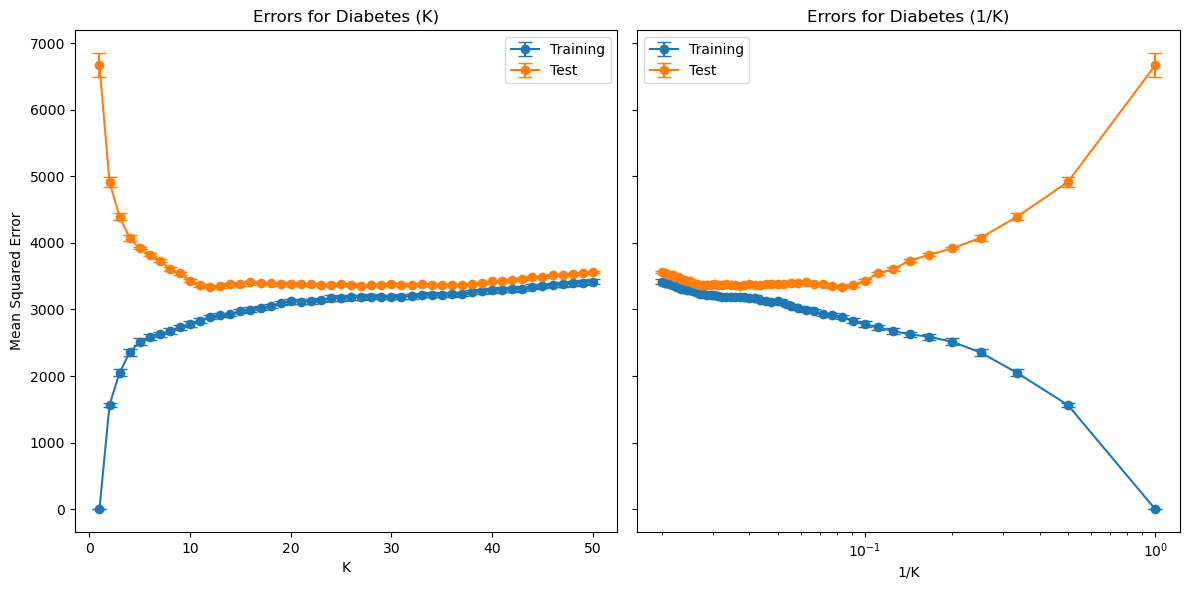

In [11]:
# Plot for the diabetes dataset
plot_errors("Diabetes", diabetes_results)

## Based on this plot, comment on The effect of the parameter K. For both datasets, identify regions of overfitting and underfitting for the KNN model.

## Diabetes Dataset:


*   **Effect of parameter K:**
  *   As the value of K increases from 1 to 50, the training error gradually increases, while the test error initially decreases and then starts to increase.
  * The training error is consistently lower than the test error across all values of K.
  *   The difference between the training and test errors is relatively large for small values of K (e.g., K < 10) and becomes smaller as K increases.
  *   The confidence intervals for both the training and test errors are wider for smaller values of K and become narrower as K increases.



---------------------------------------------------


* **Regions of overfitting and underfitting:**

 *   For small values of K (e.g., K < 5), the KNN model appears to be overfitting the training data. This is evident from the low training error and high test error, indicating that the model is capturing noise in the training data and not generalizing well to unseen data.
 *   As K increases (e.g., 5 < K < 20), the model starts to balance between overfitting and underfitting. The test error decreases, suggesting improved generalization, while the training error slightly increases.
 * For larger values of K (e.g., K > 20), the model tends to underfit the data. The training and test errors converge, but both are relatively high, indicating that the model is not capturing the underlying patterns effectively.




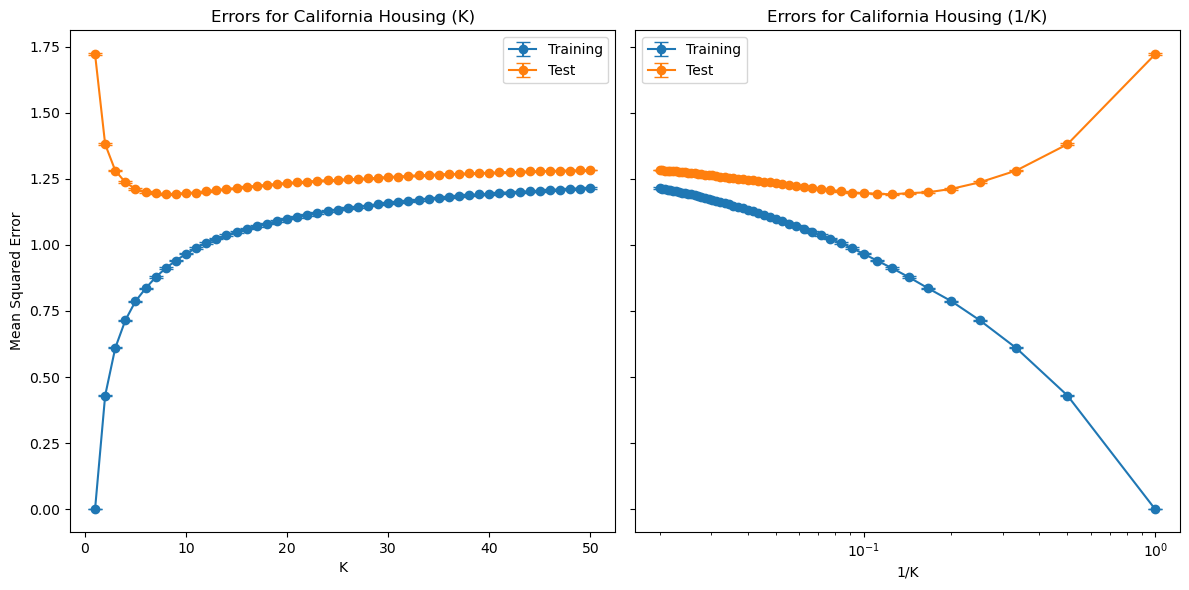

In [12]:
plot_errors("California Housing", california_results)

**California Housing Dataset:**
* **Effect of parameter K:**
    * Similar to the diabetes dataset, as K increases from 1 to 50, the training error gradually increases, while the test error initially decreases and then starts to increase also training error is consistently lower than the test error across all values of K.
    * The difference between the training and test errors is smaller compared to the diabetes dataset, suggesting better generalization overall.
    * The confidence intervals for both the training and test errors are relatively narrow, indicating more stable performance across different folds.
    
---------------------------------------------------------

* **Regions of overfitting and underfitting:**
    * For small values of K (e.g., K < 5), the KNN model shows signs of overfitting, with low training error and higher test error. However, the difference between the training and test errors is not as pronounced as in the diabetes dataset.
    * As K increases (e.g., 5 < K < 20), the model achieves a good balance between overfitting and underfitting. The test error reaches its minimum value, indicating optimal generalization performance.
    * For larger values of K (e.g., K > 20), the model starts to underfit the data. The training and test errors converge and gradually increase, suggesting that the model is not capturing the complexity of the data effectively.


### In summary, the choice of the parameter K has a significant impact on the performance of the KNN model for both datasets. Small values of K tend to lead to overfitting, while large values of K result in underfitting. The optimal value of K depends on the specific dataset and can be determined through cross-validation.

                                       Question-2(Part-III)-b

##          Question-2(Part-III)-b
## The effect of the parameter L of the CV procedure. 

Best K for Diabetes: 18, Test MSE Mean: 3357.223922368696
Best K for Diabetes: 13, Test MSE Mean: 3295.6223743300015
Best K for Diabetes: 14, Test MSE Mean: 3280.72690966217


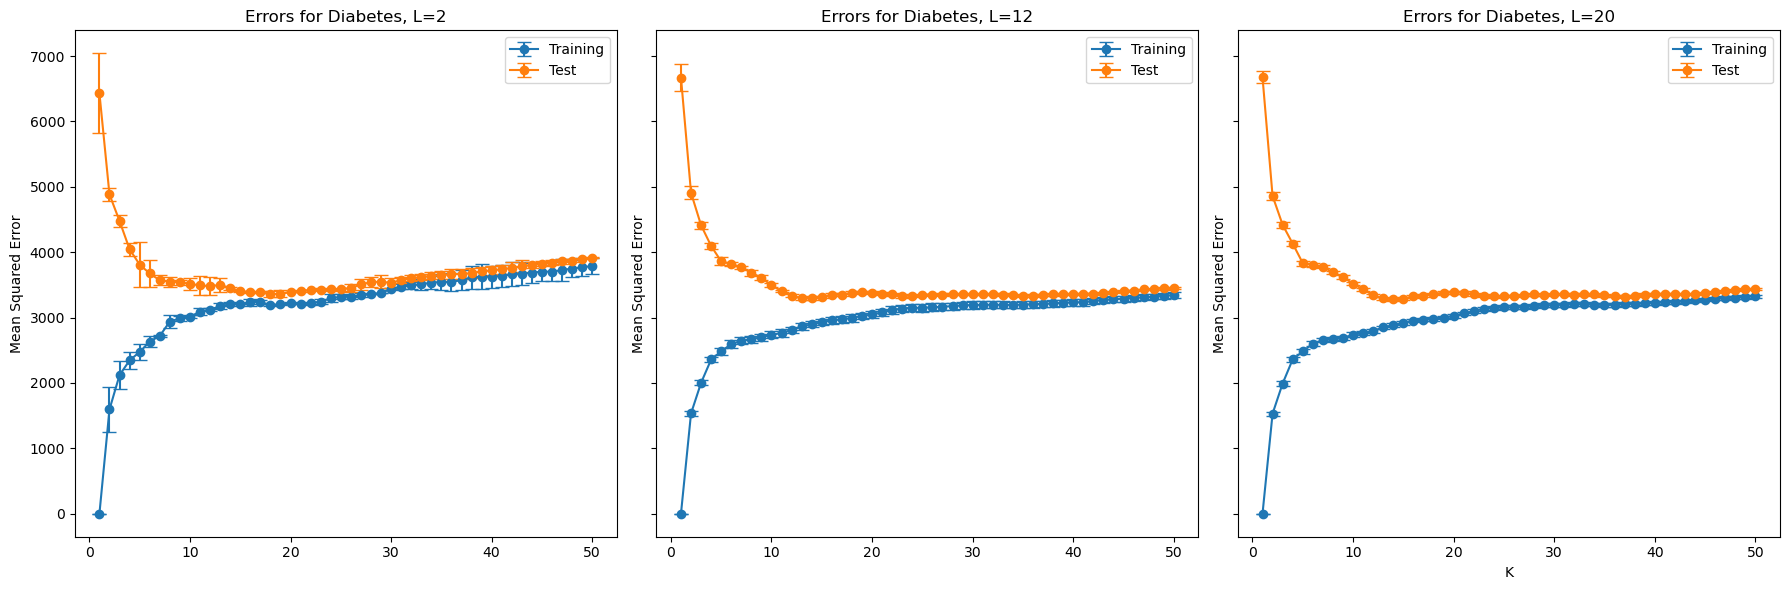

In [13]:
def evaluate_effect_of_L(dataset_name, X_train, y_train, X_test, y_test, k_values, L_values):
    fig, axs = plt.subplots(1, len(L_values), figsize=(len(L_values) * 6, 6), tight_layout=True, sharey=True)

    for i, L in enumerate(L_values):
        results = knn_parameter_search(dataset_name, X_train, y_train, X_test, y_test, k_values, n_splits=L)

        k_values = [result[0] for result in results]
        train_errors_mean = [result[1] for result in results]
        train_errors_std = [result[2] for result in results]
        test_errors_mean = [result[3] for result in results]
        test_errors_std = [result[4] for result in results]

        # Compute confidence intervals
        train_confidence_intervals = 1.96 * np.array(train_errors_std) / np.sqrt(L)
        test_confidence_intervals = 1.96 * np.array(test_errors_std) / np.sqrt(L)

        # Plot for K
        axs[i].errorbar(k_values, train_errors_mean, yerr=train_confidence_intervals, label='Training', fmt='o-', capsize=5)
        axs[i].errorbar(k_values, test_errors_mean, yerr=test_confidence_intervals, label='Test', fmt='o-', capsize=5)
        axs[i].set_ylabel('Mean Squared Error')
        axs[i].set_title(f'Errors for {dataset_name}, L={L}')
        axs[i].legend()

    plt.xlabel('K')

    plt.show()

# Define the range of L values to test
L_values = [2, 12, 20]

# Evaluate the effect of L for the diabetes dataset
evaluate_effect_of_L("Diabetes", X_diabetes_train, y_diabetes_train, X_diabetes_test, y_diabetes_test, k_values, L_values)


## Diabetes Dataset:
* As the value of L increases from 2 to 12 and then to 20, we observe the following effects:
    1. Increasing L from 2 to 12 and then to 20 narrows confidence intervals for both training and test errors, indicating more stable performance estimates.
    2. With larger L, training and test error curves become smoother.This suggests that the model's performance is less sensitive to the specific data split used in each fold when L is higher.
    3. Optimal K, minimizing test error, becomes clearer with larger L, around 10-15.
    4. Overfitting (small K) and underfitting (large K) regions remain consistent across different L.For small K (e.g., K < 5), the model tends to overfit, while for large K (e.g., K > 20), the model tends to underfit. 


Best K for California Housing: 9, Test MSE Mean: 1.2598164253638675
Best K for California Housing: 8, Test MSE Mean: 1.1733091575128365
Best K for California Housing: 9, Test MSE Mean: 1.168297136918783


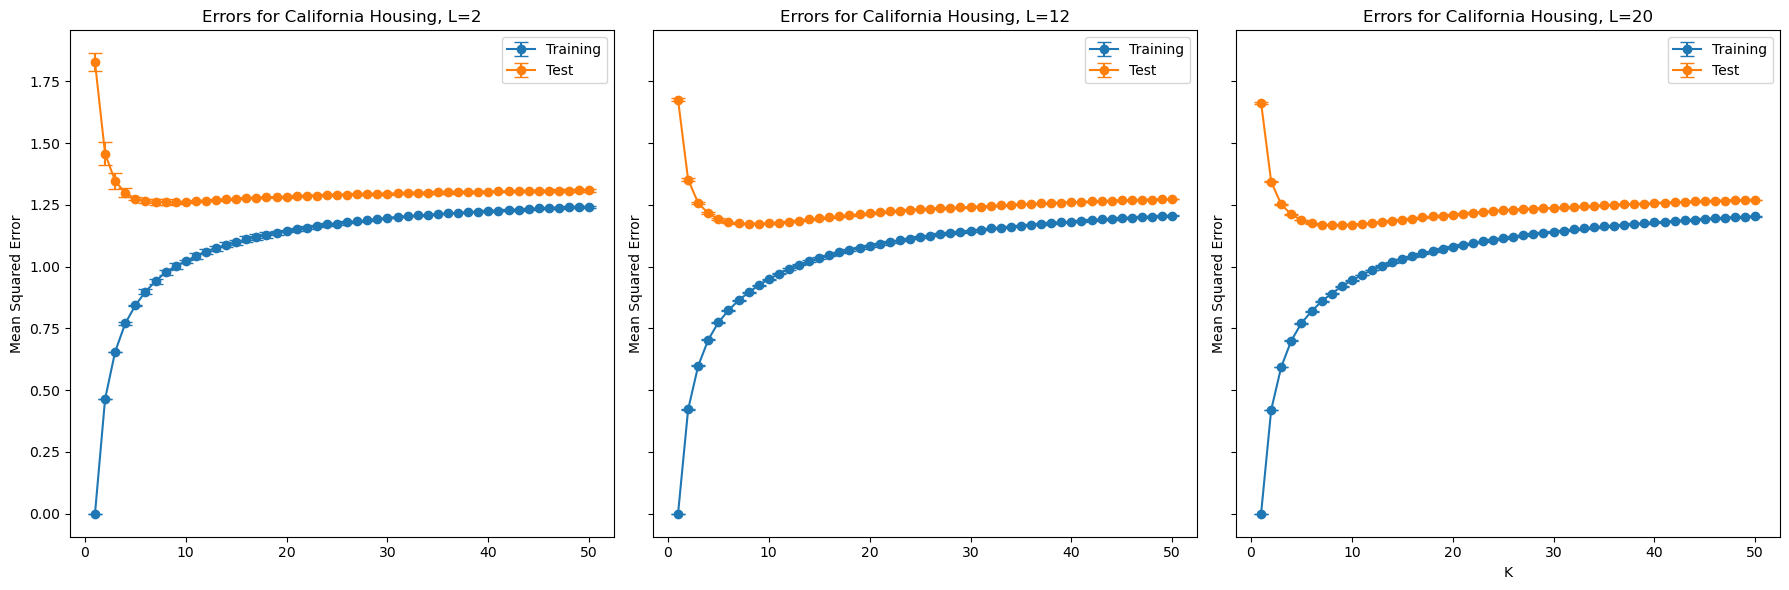

In [14]:
# Evaluate the effect of L for the California housing dataset
evaluate_effect_of_L("California Housing", X_california_train, y_california_train, X_california_test, y_california_test, k_values, L_values)


## California Housing Dataset:
* The effects of increasing L from 2 to 12 and then to 20 are similar to those observed in the Diabetes dataset:
     1. Narrower confidence intervals observed with increasing L indicate more stable and reliable performance estimates.
    2. Smoother curves for training and test errors with higher L suggest reduced sensitivity to data splits.
    3. The optimal value of K becomes clearer with larger L. For L=2, the optimal K is less distinguishable due to wider confidence intervals and fluctuations. As L increases to 12 and 20, the optimal K around 20-30 becomes more apparent.
    4. The regions of overfitting and underfitting are consistent across different values of L. The choice of L does not significantly change these regions but rather affects the stability and confidence in the performance estimates.




                                    Question-3

## ----------------------Automatic Model Selection------------------------------------

## Question-3(Part-1)

In [15]:
class KnnRegressorCV(BaseEstimator):
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
        self.ks = ks
        self.cv = cv
        self.best_k_ = None

    def fit(self, x, y):
        best_mse = float('inf')
        for k in self.ks:
            mse_scores = []
            for train_idx, val_idx in self.cv.split(x):
                knn_regressor = KnnRegressor(k=k)
                knn_regressor.fit(x[train_idx], y[train_idx])
                y_val_pred = knn_regressor.predict(x[val_idx])
                mse = mean_squared_error(y[val_idx], y_val_pred)
                mse_scores.append(mse)
            avg_mse = np.mean(mse_scores)
            if avg_mse < best_mse:
                best_mse = avg_mse
                self.best_k_ = k
        return self

    def predict(self, x):
        knn_regressor = KnnRegressor(k=self.best_k_)
        knn_regressor.fit(x, y)
        return knn_regressor.predict(x)



## Question-3(Part-II)

#### Test KNN regressor with internal CV on both datasets
#### Using outer single train/test-split for simplicity


In [16]:
# For Diabetes dataset
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.4, random_state=4)
knn_cv_diabetes = KnnRegressorCV()
knn_cv_diabetes.fit(X_diabetes_train, y_diabetes_train)
print("Best K for Diabetes (Internal CV):", knn_cv_diabetes.best_k_)

# For California Housing dataset
X_california_train, X_california_test, y_california_train, y_california_test = train_test_split(X_california, y_california, test_size=0.4, random_state=42)
knn_cv_california = KnnRegressorCV()
knn_cv_california.fit(X_california_train, y_california_train)
print("Best K for California Housing (Internal CV):", knn_cv_california.best_k_)


Best K for Diabetes (Internal CV): 12
Best K for California Housing (Internal CV): 8


In [17]:
# Create an instance of KnnRegressorCV with default parameters
knn_cv_diabetes_outer = KnnRegressorCV()
knn_cv_california_outer = KnnRegressorCV()

# Perform fitting with nested cross-validation for the diabetes dataset
knn_cv_diabetes_outer.fit(X_diabetes, y_diabetes)
print("Best K for Diabetes (Nested CV):", knn_cv_diabetes_outer.best_k_)

# Perform fitting with nested cross-validation for the California housing dataset
knn_cv_california_outer.fit(X_california, y_california)
print("Best K for California Housing (Nested CV):", knn_cv_california_outer.best_k_)


Best K for Diabetes (Nested CV): 16
Best K for California Housing (Nested CV): 10


### Report on the (mean) k value that is chosen by the KNN regressor with internal cross- validation and whether it corresponds to the best k-value with respect to the outer test sets. Comment on what factors determine whether the internal cross-validation procedure is successful in approximately selecting the best model.


#### * Diabetes Dataset:
    * Best K by internal CV: 12
    * Best K by nested CV: 16
#### * California Housing Dataset:
    * Best K by internal CV: 8
    * Best K by nested CV: 10

#### The results show that the best K values chosen by the internal cross-validation do not exactly match the best K values chosen by the nested cross-validation. Internal CV operates on a single split, while nested CV assesses multiple outer splits, resulting in varied optimal K selections.

#### 1. Representativeness of the Train/Test Split:
If the single split accurately reflects the dataset's distribution, the chosen K value is more likely to generalize well.However, if the split is unrepresentative (e.g., biased sampling), the selected K may not perform well on unseen data.
    
#### 2. Variability of the Dataset:
High variability may result in different optimal K values across different splits.
Internal CV may not capture this variability adequately with a single split, leading to suboptimal K selection.
#### 3. Dataset Size:
Larger datasets provide more information for internal CV to estimate the best K value accurately.
Smaller datasets may suffer from overfitting or underfitting if not representative.
#### 4. Complexity of Data Distribution:
Complex distributions or outliers can affect the performance of internal CV.
#### 5. Hyperparameter Choice and Number of Folds:
The range of K values considered and the number of folds used in cross-validation can impact the success of internal CV.A wider range and more folds can provide a more comprehensive evaluation but require more computational resources.
#### 6. Quality of Training Data:
Noisy or irrelevant data may lead to suboptimal K choices.


### References
* https://scikit-learn. org/stable/modules/cross_validation.html.
* https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html -BaseEstimator
* https://scikit-learn.org/stable/modules/cross_validation.html  -K-Fold and cross validations
* https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/ -Bias-variance tradeoff
* Activity 1.1 ( Monash tutorial)
